In [49]:
"""
2016-10-27 9:05:00
Deep Learning Book p. 106-118

LOG: Today I learned about some basic constraints on the
effectiveness of a machine learning algorithms, and strategies
to optimize the effectiveness. In a perfect world, we have
a strong intuition about the probability distribution of the
system we are modeling, and complete catalog of the inputs. We
can use this intuition to choose the best algorithm.

LEARNING: Try to reproduce the polynomial fitting problem
outlined in the book
"""
import numpy as np
# Generate a polynomial distribution with some random noise
# Most of this is copied and slightly changed from
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html
def my_polynomial(x):
    noise = 50 * (np.random.rand() - .5)
    return 10 + 2 * x + x ** 2 - .25 * (x ** 3)

x_plot = np.linspace(0, 5, 100)
ixs = [np.random.randint(0, 100) for i in range(20)]
x = x_plot[ixs]

# The noise is meant to prevent the beyond the Bayes error
y_plot = my_polynomial(x_plot)
y = y_plot[ixs]


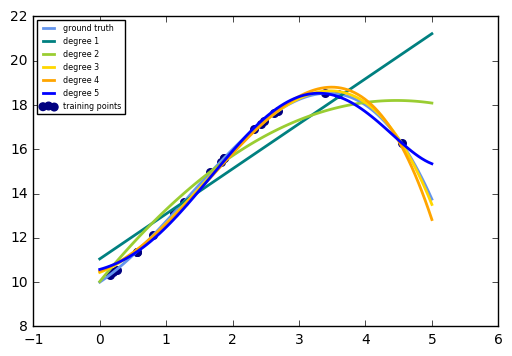

In [50]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Plot the results
colors = ['teal', 'yellowgreen', 'gold', 'orange', 'blue']
lw = 2
# Plot the original function
plt.plot(x_plot, y_plot, color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

# Make matrix versions
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

# I don't know what Ridge regression is, or why I am expanding my features to create
# polynomial models.
for count, degree in enumerate([1, 2, 3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    predicted_y_plot = model.predict(X_plot)
    plt.plot(x_plot, predicted_y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='best', fontsize='xx-small')

plt.show()